In [121]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import mean_squared_error,mean_absolute_error,accuracy_score
from sklearn.linear_model import LinearRegression

In [122]:
df=pd.read_csv("winequality.csv")

In [123]:
df.shape

(1599, 12)

In [124]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [125]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [126]:
df.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

In [127]:
df.apply(lambda x:len(x.unique()))

fixed acidity            96
volatile acidity        143
citric acid              80
residual sugar           91
chlorides               153
free sulfur dioxide      60
total sulfur dioxide    144
density                 436
pH                       89
sulphates                96
alcohol                  65
quality                   6
dtype: int64

In [128]:
duplicate=df.duplicated()
print(duplicate.sum())
df[duplicate]

240


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
4,7.4,0.700,0.00,1.90,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
11,7.5,0.500,0.36,6.10,0.071,17.0,102.0,0.99780,3.35,0.80,10.5,5
27,7.9,0.430,0.21,1.60,0.106,10.0,37.0,0.99660,3.17,0.91,9.5,5
40,7.3,0.450,0.36,5.90,0.074,12.0,87.0,0.99780,3.33,0.83,10.5,5
65,7.2,0.725,0.05,4.65,0.086,4.0,11.0,0.99620,3.41,0.39,10.9,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1563,7.2,0.695,0.13,2.00,0.076,12.0,20.0,0.99546,3.29,0.54,10.1,5
1564,7.2,0.695,0.13,2.00,0.076,12.0,20.0,0.99546,3.29,0.54,10.1,5
1567,7.2,0.695,0.13,2.00,0.076,12.0,20.0,0.99546,3.29,0.54,10.1,5
1581,6.2,0.560,0.09,1.70,0.053,24.0,32.0,0.99402,3.54,0.60,11.3,5


In [129]:
df.drop_duplicates (inplace=True)

In [130]:
df.shape

(1359, 12)

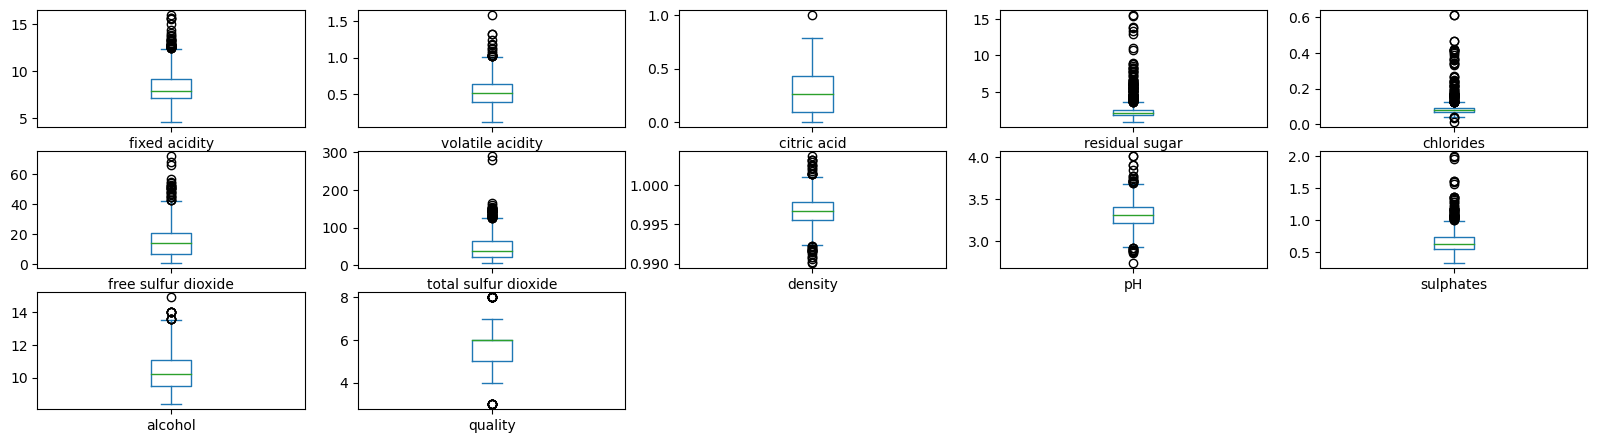

In [131]:
df.plot(kind='box', subplots=True, layout=(10,5), figsize=(20,18))
plt.show()

In [132]:
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Calculate the IQR for each numeric column
q1 = df[numeric_cols].quantile(0.25)
q3 = df[numeric_cols].quantile(0.75)
iqr = q3 - q1


def replace_outliers(df):
    for col in numeric_cols:
        lower_bound = q1[col] - 1.5 * iqr[col]
        upper_bound = q3[col] + 1.5 * iqr[col]
        df[col] = df[col].clip(lower=lower_bound, upper=upper_bound)
    return df

# Replace outliers with the IQR
df = replace_outliers(df)

In [133]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

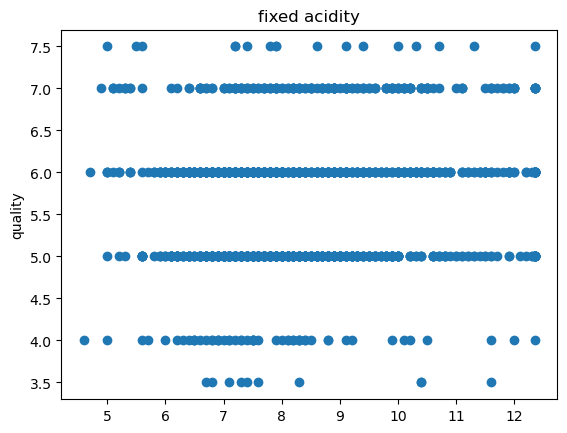

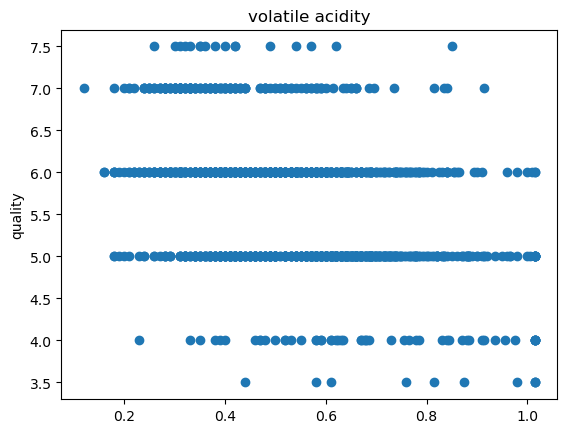

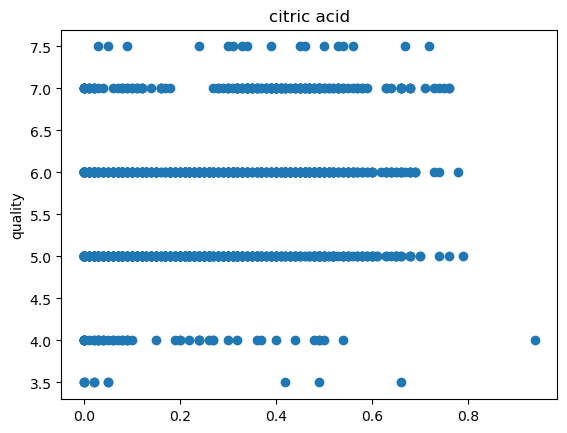

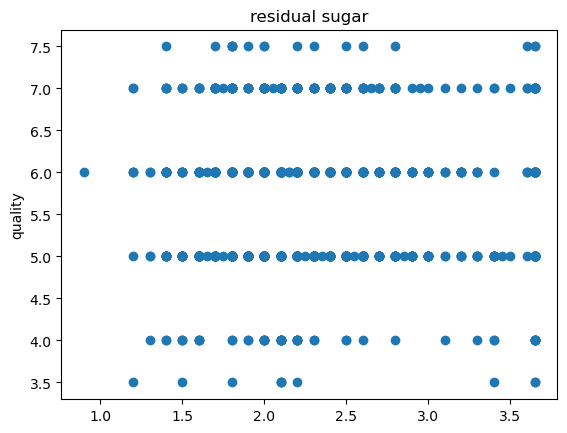

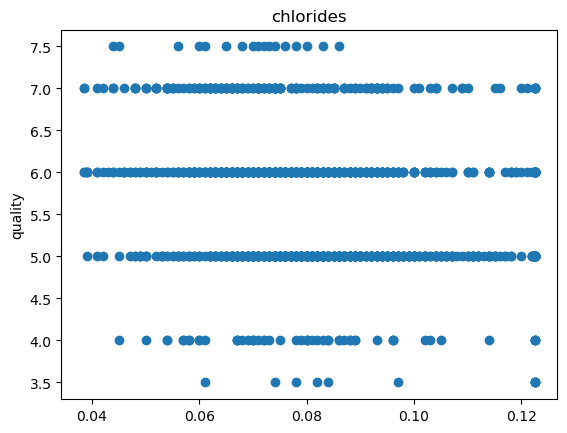

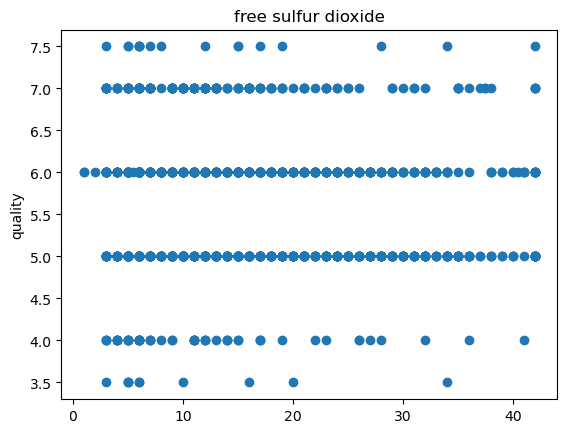

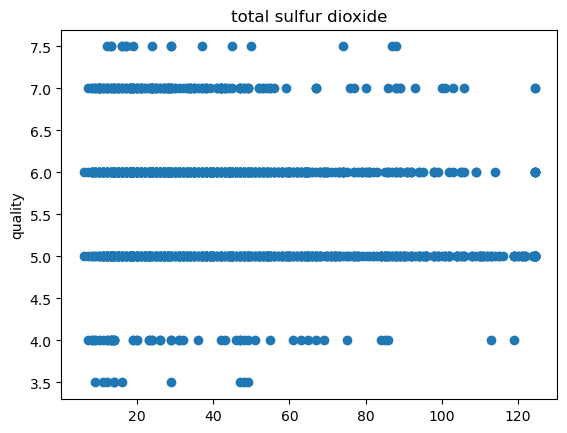

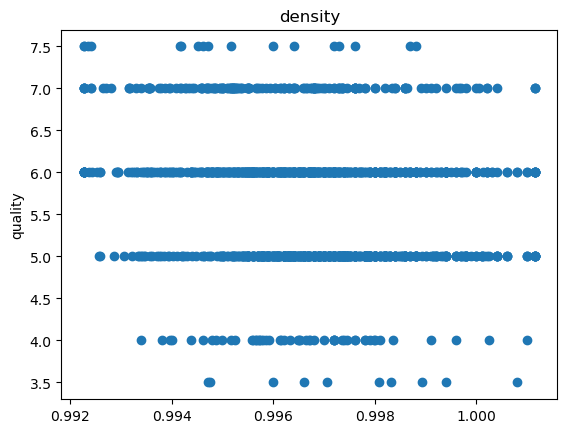

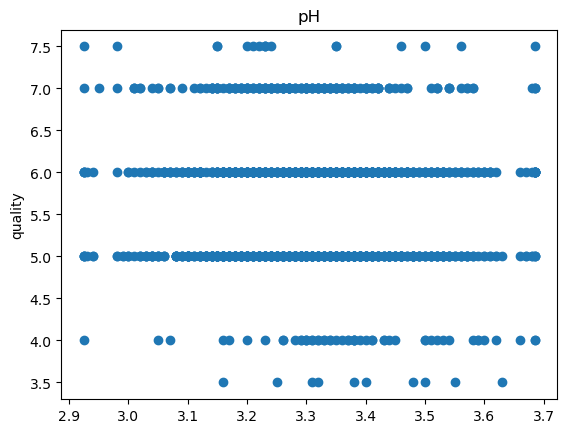

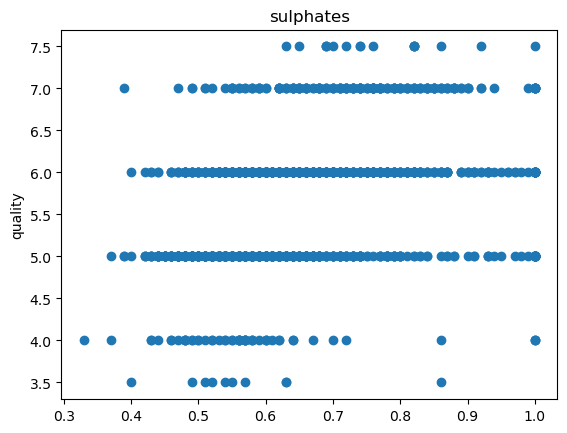

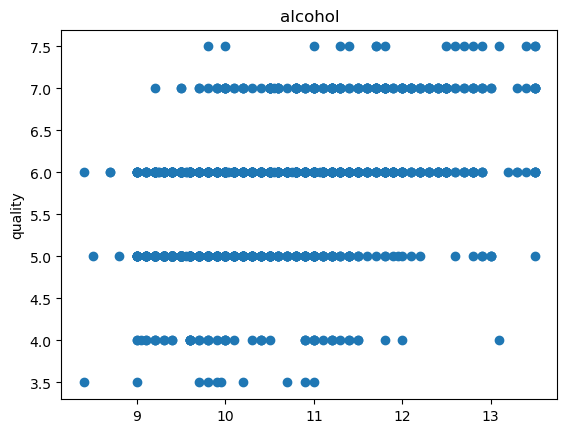

In [134]:
#because of the variability of the unique values of the numeric columns a scatter plot with the target value will be of use
#list of all the numeric columns
num = df.select_dtypes('number').columns.to_list()
#numeric df
BM_num =  df[num]

for numeric in BM_num[num[:11]]:
    plt.scatter(BM_num[numeric], BM_num['quality'])
    plt.title(numeric)
    plt.ylabel('quality')
    plt.show()

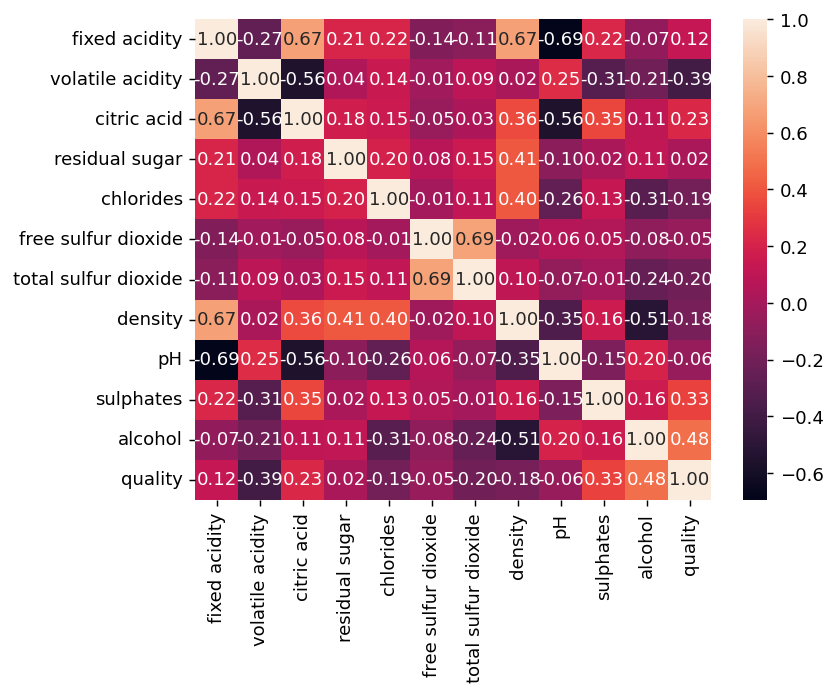

In [135]:
#plotting the correlation matrix
corr = df.corr()
 
plt.figure(dpi=130)
sns.heatmap(df.corr(), annot=True, fmt= '.2f')
plt.show()

In [136]:
train_df=df[:1087]
test_df=df[1087:]
X = train_df.drop('quality', axis=1)
y = train_df['quality']
X_train_df, X_test_df, y_train_df, y_test_df = train_test_split(X, y, test_size = 0.2,random_state=200)
print(" X_train dataset: ", X_train_df.shape)
print(" y_train dataset: ", y_train_df.shape)
print(" X_test dataset: ", X_test_df.shape)
print(" y_test dataset: ", y_test_df.shape)

 X_train dataset:  (869, 11)
 y_train dataset:  (869,)
 X_test dataset:  (218, 11)
 y_test dataset:  (218,)


In [137]:
LR = linear_model.LinearRegression()
LR.fit(X_train_df,y_train_df)
LinearRegression()
pred = LR.predict(X_test_df)
print('MEAN ABSOLUTE ERROR :', mean_absolute_error(y_test_df,pred))

print('MEAN SQUARED ERROR :', mean_squared_error(y_test_df,pred))

MEAN ABSOLUTE ERROR : 0.5057460006424241
MEAN SQUARED ERROR : 0.4000103336834797


In [138]:
models = [LinearRegression()]
scores = []

for model in models:
   
    model.fit(X_train_df, y_train_df)
    predicted = model.predict(X_test_df)
    scores.append({'Model': type(model).__name__, 'Scores' : model.score(X_test_df,y_test_df)})

Score_Train = pd.DataFrame(scores)

print(Score_Train)

              Model    Scores
0  LinearRegression  0.379748


In [139]:
print (model.score(X_train_df, y_train_df))
print(model.score(X_test_df, y_test_df))

0.3980198721495817
0.3797484062131329


In [140]:
from sklearn.metrics import r2_score

max_Accu=0
max_RS=0

for i in range(1, 1000):
    x_train_df, x_test_df, y_train_df, y_test_df = train_test_split(X, y, test_size=0.20, random_state=i)
    lr=LinearRegression()
    lr.fit(x_train_df, y_train_df)
    pred = lr.predict(x_test_df)
    r2 = r2_score(y_test_df, pred)
    
    if r2>max_Accu:
        max_Accu=r2
        max_RS=i

print("Best r2 score is", max_Accu,"on Random State", max_RS)

Best r2 score is 0.540881027440384 on Random State 552
